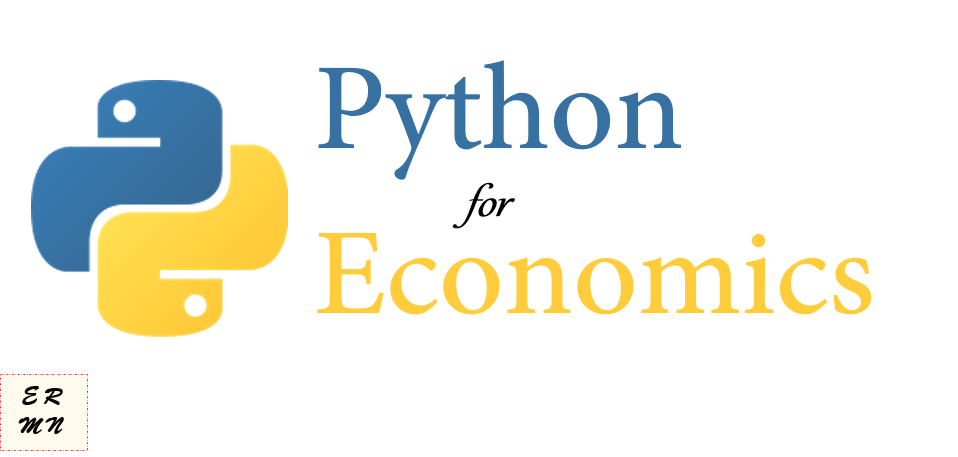

# <font face="gotham" color="DarkCyan"> Example 1

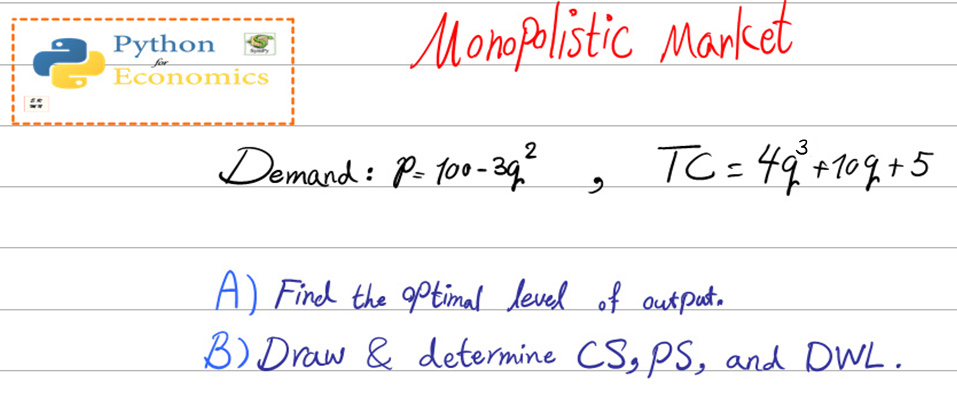

In [1]:
import sympy as sp
import sympy.plotting as spp

sp.init_printing(use_latex='mathjax')

q, p=sp.symbols('q p')

In [2]:
# Demand criterion
D=100-3*q**2

# Cost criterion
TC=4*q**3+10*q+5

display(D,TC)

         2
100 - 3⋅q 

   3           
4⋅q  + 10⋅q + 5

In [3]:
# Average cost criterion
AC=(TC/q).simplify()

# Marginal cost criterion
MC=TC.diff(q)

# Marginal revenue criterion
MR=(D*q).diff(q)

display(AC,MC,MR)

   2        5
4⋅q  + 10 + ─
            q

    2     
12⋅q  + 10

         2
100 - 9⋅q 

In [4]:
# Part A: Solution
Optq=sp.solve(sp.Eq(MR,MC),q)

display(Optq)
display(Optq[0].evalf(3),Optq[1].evalf(3))

optq=Optq[1].evalf(3)

⎡-√210   √210⎤
⎢──────, ────⎥
⎣  7      7  ⎦

-2.07

2.07

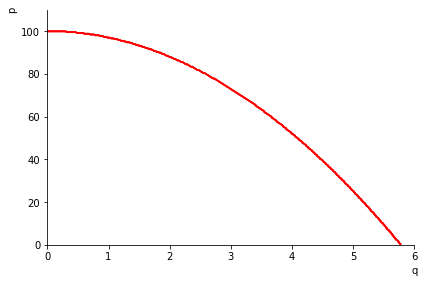

In [5]:
# Part B: Solution
Dp=spp.plot_implicit(sp.Eq(p,D),(q,0,6),(p,0,110),
                     line_color='red',axis_center=(0,0),adaptive=False,show=False)
Dp.show()

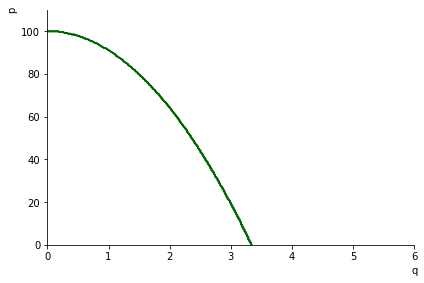

In [6]:
MRp=spp.plot_implicit(sp.Eq(p,MR),(q,0,6),(p,0,110),
                      line_color='DarkGreen',axis_center=(0,0),adaptive=False,show=False)
MRp.show()

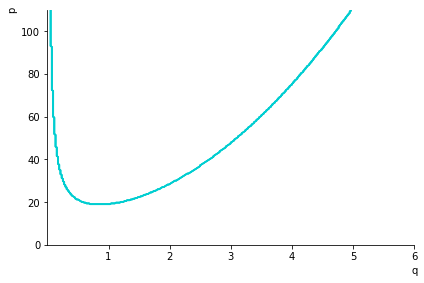

In [7]:
ACp=spp.plot_implicit(sp.Eq(p,AC),(q,0.0000001,6),(p,0,110),
                      line_color='Darkturquoise',axis_center=(0,0),adaptive=False,show=False)
ACp.show()

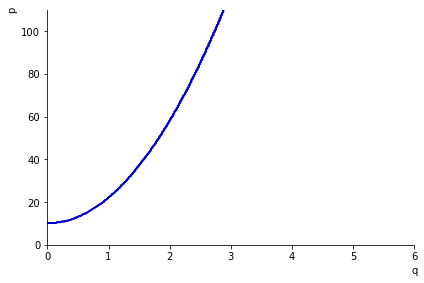

In [8]:
MCp=spp.plot_implicit(sp.Eq(p,MC),(q,0,6),(p,0,110),
                      line_color='MediumBlue',axis_center=(0,0),adaptive=False,show=False)
MCp.show()

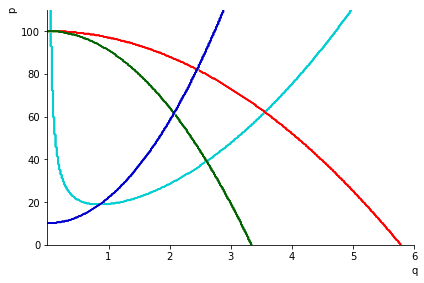

In [9]:
ACp.extend(Dp); ACp.extend(MRp); ACp.extend(MCp)
ACp.show()

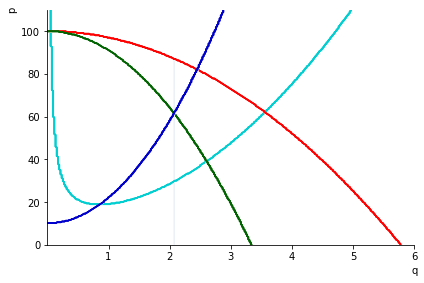

In [10]:
L1=spp.plot_implicit(sp.Eq(q,optq),(q,0,6),(p,0,D.subs(q,optq)),
                      line_color='lightsteelblue',axis_center=(0,0),adaptive=True,show=False)

ACp.extend(L1)
ACp.show()

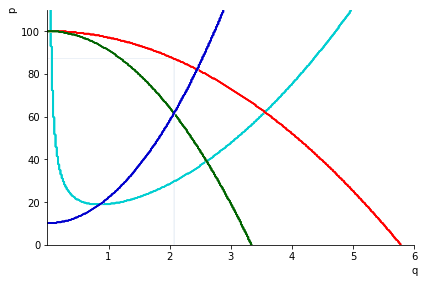

In [11]:
L2=spp.plot_implicit(sp.Eq(p,D.subs(q,optq)),(q,0,optq),(p,0,110),
                      line_color='lightsteelblue',axis_center=(0,0),adaptive=True,show=False)

ACp.extend(L2)
ACp.show()

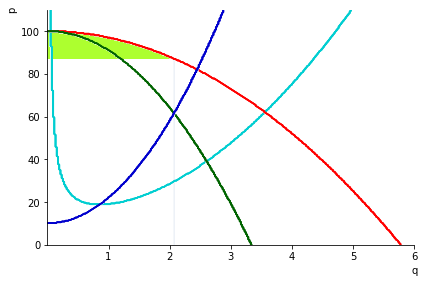

In [12]:
CSp=spp.plot_implicit(sp.And(D>=p,q>=0,p>=D.subs(q,optq)),(q,0,10),(p,0,110),
                      line_color='Greenyellow',axis_center=(0,0),show=False)

ACp.extend(CSp)
ACp.show()

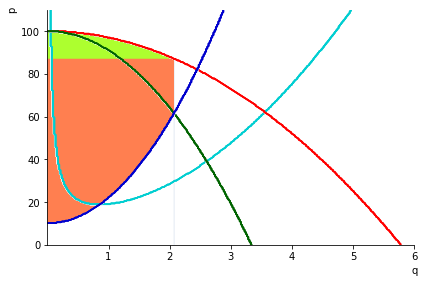

In [13]:
PSp=spp.plot_implicit(sp.And(MC<=p,q>=0,p<=D.subs(q,optq),q<=optq),(q,0,10),(p,0,110),
                      line_color='coral',axis_center=(0,0),show=False)

ACp.extend(PSp)
ACp.show()

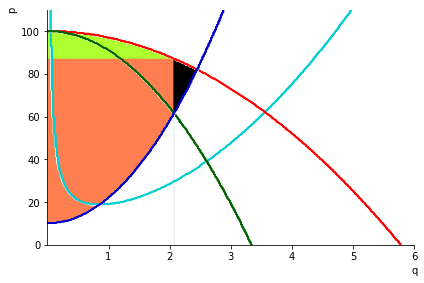

In [14]:
DWLp=spp.plot_implicit(sp.And(MC<=p,q>=0,p<=D.subs(q,optq),q>=optq,D>=p),(q,0,10),(p,0,110),
                      line_color='Black',axis_center=(0,0),show=False)

ACp.extend(DWLp)
ACp.show()

In [15]:
# Computing CS
CS=sp.integrate(D,(q,0,optq))-optq*D.subs(q,optq)

# Computing PS
PS=optq*D.subs(q,optq)-sp.integrate(MC,(q,0,optq))

# Computing DWL
DWL=sp.integrate(D,(q,optq,sp.solve(sp.Eq(D,MC),q)[1]))-sp.integrate(MC,(q,optq,sp.solve(sp.Eq(D,MC),q)[1]))

display(CS.evalf(3),PS.evalf(3),DWL.evalf(3))

17.8

124.

5.00

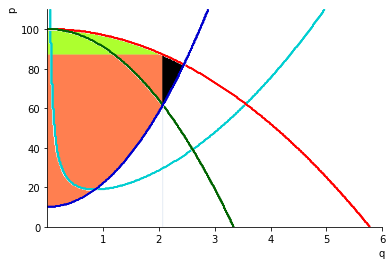

In [16]:
ACp.save('CS&PS&DWL.pdf')